# Módulo 4: Modelo de clasificación QSAR (paso a paso)

En este módulo desarrollaremos nuestro primer modelo QSAR, concretamente un modelo para la toxicidad aguda en lombrices de tierra. Dado que desarrollar un modelo QSAR implica un flujo de trabajo con varios pasos y este es tu primer modelo, este módulo será extenso, ya que exploraremos cada paso cuidadosamente. Por ello, el flujo de trabajo se divide en diferentes lecciones, y la práctica en Python correspondiente está separada en distintos archivos Jupyter Notebook. Como recordatorio, en este curso el flujo de trabajo para desarrollar un modelo QSAR se divide en las siguientes partes:

- Parte 1: Obtención y depuración de datos
- Parte 2: Cálculo de descriptores moleculares
- Parte 3: División entre entrenamiento y prueba, y estandarización
- Parte 4: Selección de descriptores
- Parte 5: Desarrollo y optimización del modelo
- Parte 6: Predicción y dominio de aplicabilidad

# Parte 3: División entre entrenamiento y prueba, y estandarización

En esta lección dividiremos el conjunto de datos en dos grupos diferentes: el conjunto de entrenamiento y el conjunto de prueba. El conjunto de entrenamiento se utilizará para desarrollar (entrenar) nuestro modelo y el conjunto de prueba para evaluar su capacidad predictiva. Además, transformaremos los valores de los descriptores para que estén estandarizados.

Primero, leeremos el conjunto de datos con los descriptores calculados en la parte 3.

Después, dividiremos el conjunto de datos en dos mediante una separación aleatoria.

A continuación, realizaremos la imputación para evitar los valores de descriptores no válidos.

Finalmente, estandarizaremos los descriptores.

## Sección 1: Abre el juego de datos con los descriptores

Para poder utilizar nuestros datos en la construcción de un modelo predictivo de aprendizaje automático, necesitaremos obtener un conjunto de **entrenamiento** y un conjunto de **validación**.

Completa el código en la siguiente celda para cargar los datos desde el último archivo guardado en la lección anterior y muestra las columnas para comprobar que es correcto.

In [20]:
import pandas as pd

df_classification_with_descriptors = pd.read_csv('Earthworm_acute_toxicity_descriptors_cleaned.csv', sep=";")
# create new colum y from y_rdk to facilitate data handling
df_classification_with_descriptors['y'] = df_classification_with_descriptors['y_rdk']
df_classification_with_descriptors.drop(columns=['y_rdk'], inplace=True)
df_classification_with_descriptors.drop(columns=['y_mdr'], inplace=True)


## Sección 2: Separación en Train/test

La forma más sencilla es dividir los datos de forma aleatoria. Consulta la documentación de scikit-learn sobre el tema:
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

En nuestro caso, estableceremos una proporción del 70% de los datos para entrenamiento y el 30% para el conjunto de prueba.
Guarda los conjuntos de entrenamiento y prueba en las variables predeterminadas.

In [21]:
#Importa el modulo train_test_split de sklearn.model_selection
from sklearn.model_selection import train_test_split
#Completa con el dataframe a dividir y el ratio que quieres para el set de entrenamiento
df_train, df_test = train_test_split(df_classification_with_descriptors) 

print('Full data shape:',df_classification_with_descriptors.shape)
print('Train shape:',df_train.shape,'Test shape:', df_test.shape)
df_test.head()

Full data shape: (130, 1644)
Train shape: (97, 1644) Test shape: (33, 1644)


,SMILES,MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,SPS,MolWt,HeavyAtomMolWt,ExactMolWt,...,TSRW10,MW,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb1,mZagreb2,y
73,CSc1nnc(C(C)(C)C)c(=O)n1N,11.717245,11.717245,0.280694,-0.331209,0.539861,11.714286,214.294,200.182,214.088832,...,45.959872,214.088832,7.646030,284,22,70.0,81.0,7.256944,3.083333,1
99,CCOP(=S)(OCC)SCn1c(=O)oc2cc(Cl)ccc21,11.919139,11.919139,0.310261,-2.445247,0.682262,12.142857,367.816,352.696,366.986864,...,69.009026,366.986864,10.194080,959,31,106.0,123.0,8.118056,4.791667,1
23,COP(=O)(OC)C(O)C(Cl)(Cl)Cl,11.349560,11.349560,1.087207,-3.733989,0.621638,16.166667,257.437,249.373,255.922578,...,42.920812,255.922578,12.796129,185,18,56.0,63.0,7.736111,2.750000,1
129,Cc1c(F)cc(C(=O)NC2CC2)cc1-c1ccc(C(=O)NCC(C)(C)...,14.386476,14.386476,0.014735,-0.451626,0.823484,13.892857,383.467,357.259,383.200905,...,81.589367,383.200905,7.096313,2271,42,148.0,171.0,10.812500,5.930556,1
77,CCNC(=O)[C@H](C)OC(=O)Nc1ccccc1,11.418244,11.418244,0.309526,-0.806794,0.836621,11.411765,236.271,220.143,236.116092,...,48.369352,236.116092,7.155033,600,20,76.0,82.0,6.694444,4.027778,1


Después de ejecutar correctamente la celda anterior, deberías haber dividido el DataFrame original en dos DataFrames con las mismas columnas pero menos filas (que suman el total). También puedes visualizar las primeras líneas del conjunto de prueba.

Vuelve a ejecutar la celda y observa los resultados nuevamente. El número de filas debería ser el mismo, pero es posible que cambie la identidad de las moléculas en el conjunto de prueba.

La aleatoriedad es muy útil en el aprendizaje automático, ya que permite explorar distintas combinaciones sin introducir sesgos. Sin embargo, tiene el inconveniente de que los resultados no son reproducibles. Por eso, es muy conveniente utilizar una **semilla**.
Una **semilla** es un valor predefinido que el generador de números aleatorios utiliza para obtener sus resultados de manera reproducible (aunque compleja y casi aleatoria).
Cualquier número puede utilizarse, ya que no se espera que tenga un significado concreto ni que se optimice. En este caso, vamos a utilizar el año actual, por ejemplo.

Por tanto, para obtener los resultados esperados y poder comprobarlos en este módulo práctico, debes usar la semilla 2025 en la división aleatoria (usando el parámetro `random_state=2025` como parte de la llamada a `train_test_split`).

In [22]:
#Completa con el dataframe a dividir y el ratio que quieres para el set de entrenamiento
df_train, df_test = train_test_split(df_classification_with_descriptors, random_state=2025) 


print('Full data shape:',df_classification_with_descriptors.shape)
print('Train shape:', df_train.shape,'Test shape:', df_test.shape)
df_test.head()

Full data shape: (130, 1644)
Train shape: (97, 1644) Test shape: (33, 1644)


,SMILES,MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,SPS,MolWt,HeavyAtomMolWt,ExactMolWt,...,TSRW10,MW,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb1,mZagreb2,y
46,[O-][n+]1nc(-n2ccnc2)nc2ccc(Cl)cc21,11.720124,11.720124,0.270669,0.270669,0.476945,10.882353,247.645,241.597,247.026087,...,63.253831,247.026087,10.740265,497,25,92.0,109.0,4.916667,3.666667,0
19,CCC(C)(NC(=O)c1cc(Cl)c(C)c(Cl)c1)C(=O)CCl,12.231607,12.231607,0.152748,-0.997349,0.825847,13.700000,336.646,320.518,335.024662,...,53.502307,335.024662,9.306241,816,33,98.0,114.0,9.979167,4.583333,0
60,Nc1nc(N)nc(NC2CC2)n1,5.373337,5.373337,0.158009,0.158009,0.552558,16.000000,166.188,156.108,166.096694,...,61.032612,166.096694,7.549850,201,13,62.0,70.0,3.944444,2.583333,0
47,CO/C=C(/C(=O)OC)c1ccccc1Oc1cc(Oc2ccccc2C#N)ncn1,12.126699,12.126699,0.183816,-0.576185,0.330013,10.633333,403.394,386.258,403.116821,...,65.233668,403.116821,8.576954,2630,46,148.0,171.0,9.388889,7.027778,1
82,CCCN(CCC)C(=O)SCc1ccccc1,11.985308,11.985308,0.206068,0.206068,0.756281,10.235294,251.395,230.227,251.134385,...,48.172624,251.134385,6.608800,596,20,74.0,80.0,6.083333,4.194444,1


Ejecuta la siguiente celda para comprobar cómo quedaron las proporciones de moléculas positivas y negativas en tus conjuntos de entrenamiento y prueba.

Train. Positives: 43  Negatives: 54  Ratio: 0.7962962962962963
Test. Positives: 15  Negatives: 18  Ratio: 0.8333333333333334


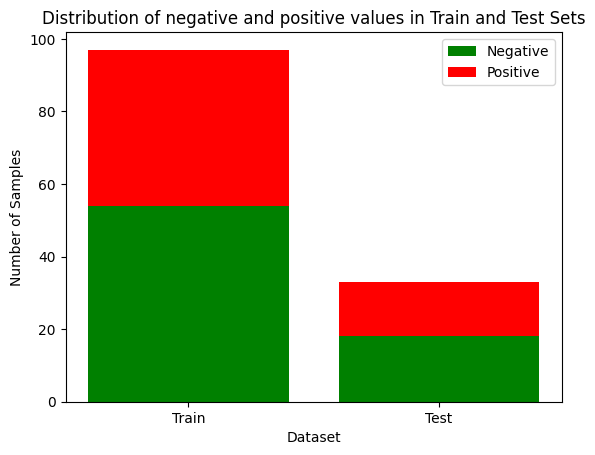

In [25]:
%matplotlib inline

import matplotlib.pyplot as plt
def plot_distribution():
       #Calcula el número de 1s y 0s en el set de entrenamiento y test
       train_value_counts = df_train['y'].value_counts()
       test_value_counts = df_test['y'].value_counts()
       #Crea una grafica de barras apiladas
       categories = ['Train', 'Test']
       negative_value_counts = [train_value_counts[0], test_value_counts[0]]
       positive_value_counts = [train_value_counts[1], test_value_counts[1]]
       #Grafica cada serie individual
       plt.bar(categories, negative_value_counts, label='Negative', color='green')
       plt.bar(categories, positive_value_counts, bottom=negative_value_counts, label='Positive', color='red')
       #Añade etiquetas, título y leyenda
       plt.xlabel('Dataset')
       plt.ylabel('Number of Samples')
       plt.title('Distribution of negative and positive values in Train and Test Sets')
       plt.legend()

       dic = {"Train": df_train['y'].value_counts(ascending=True),
              "Test": df_test['y'].value_counts(ascending=True)}



       print('Train. Positives:',train_value_counts[1],' Negatives:',train_value_counts[0],' Ratio:',train_value_counts[1]/train_value_counts[0])
       print('Test. Positives:',test_value_counts[1],' Negatives:',test_value_counts[0],' Ratio:',test_value_counts[1]/test_value_counts[0])
plot_distribution()

Si observas los valores en el gráfico, la proporción entre los bloques rojos (correspondientes a los valores positivos) y los bloques verdes (correspondientes a los valores negativos) no está distribuida de forma similar en ambos conjuntos. De hecho, como también puedes ver en los números, los valores positivos se dividen entre los dos conjuntos con 37 positivos y 21 negativos. Sin embargo, los negativos se asignan mayoritariamente al conjunto de entrenamiento (54 frente a 18), lo que genera un desequilibrio considerable.

Este es un posible —y no deseado— resultado de una división aleatoria, pero la división aleatoria puede modificarse para tener en cuenta la distribución del endpoint.

Para hacerlo, copia a continuación el código de la división anterior (incluyendo random_state) y añade un parámetro adicional a la función train_test_split: `stratify`.
En concreto, como queremos que el algoritmo asegure la misma distribución de la columna `y`, debemos usar: `stratify=df_classification_with_descriptors['y']`.

Full data shape: (130, 1644)
Train shape: (97, 1644) Test shape: (33, 1644)
Train. Positives: 43  Negatives: 54  Ratio: 0.7962962962962963
Test. Positives: 15  Negatives: 18  Ratio: 0.8333333333333334


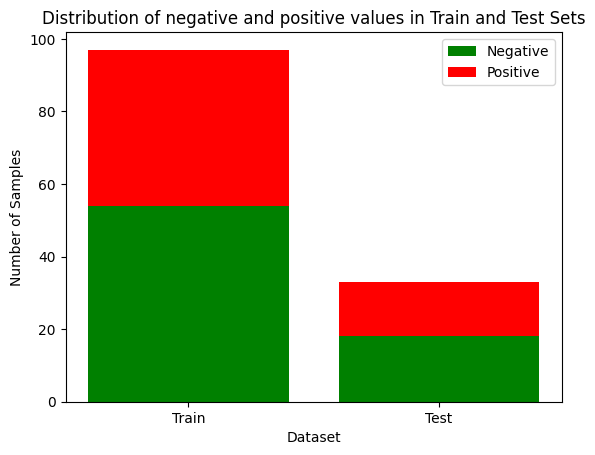

In [26]:
#Copia y modifica aquí el código para la división aleatoria incluyendo el parámetro stratify
df_train, df_test = train_test_split(df_classification_with_descriptors, random_state=2025, stratify=df_classification_with_descriptors['y']) 


print('Full data shape:',df_classification_with_descriptors.shape)
print('Train shape:', df_train.shape,'Test shape:', df_test.shape)
plot_distribution()


### **Q1.** ¿Cuál es el SMILES de la primera molécula del test de validación?

Utiliza la celda de abajo para representar gráficamente la nueva distribución de los valores positivos y negativos.

Train. Positives: 43  Negatives: 54  Ratio: 0.7962962962962963
Test. Positives: 15  Negatives: 18  Ratio: 0.8333333333333334


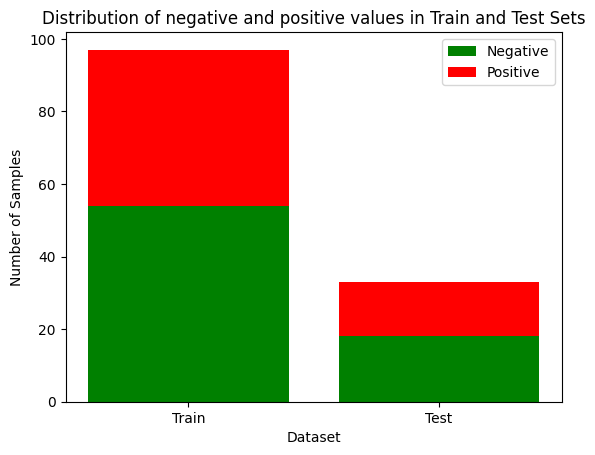

In [27]:
%matplotlib inline

#Importamos matplotlib para graficar
import matplotlib.pyplot as plt

#Calcula cuantos 1s y 0s hay en el set de entrenamiento y de validación
train_value_counts = df_train['y'].value_counts()
test_value_counts = df_test['y'].value_counts()
#Crea una grafica de barras apiladas
categories = ['Train', 'Test']
negative_value_counts = [train_value_counts[0], test_value_counts[0]]
positive_value_counts = [train_value_counts[1], test_value_counts[1]]
#Grafica cada serie individual
plt.bar(categories, negative_value_counts, label='Negative', color='green')
plt.bar(categories, positive_value_counts, bottom=negative_value_counts, label='Positive', color='red')
#Añade etiquetas, título y leyenda
plt.xlabel('Dataset')
plt.ylabel('Number of Samples')
plt.title('Distribution of negative and positive values in Train and Test Sets')
plt.legend()

dic = {"Train": df_train['y'].value_counts(ascending=True),
       "Test": df_test['y'].value_counts(ascending=True)}


print('Train. Positives:',train_value_counts[1],' Negatives:',train_value_counts[0],' Ratio:',train_value_counts[1]/train_value_counts[0])
print('Test. Positives:',test_value_counts[1],' Negatives:',test_value_counts[0],' Ratio:',test_value_counts[1]/test_value_counts[0])


Ahora, la proporción en ambas columnas debería ser más similar, lo cual es deseable para obtener una evaluación fiable del modelo. Además, la proporción en el conjunto de entrenamiento es más equilibrada.
Idealmente, el conjunto de entrenamiento debe estar balanceado para evitar sesgos en el modelo, aunque existen formas de gestionar este desequilibrio dentro de los algoritmos de aprendizaje automático.

Ejecuta la siguiente celda para guardar los conjuntos de entrenamiento y validación en dos archivos CSV, de forma que podamos utilizarlos en las siguientes partes.
Asegúrate de guardar estos archivos, ya que los necesitarás más adelante en este módulo.

In [28]:
#Guarda el set de entrenamiento como "Earthworm_acute_toxicity_Train.csv"
df_train.to_csv('Earthworm_acute_toxicity_Train.csv', sep=';', index=False)
#Guarda el set de validación como "Earthworm_acute_toxicity_Test.csv"
df_test.to_csv('Earthworm_acute_toxicity_Test.csv', sep=';', index=False)


## Sección 3: Imputación de la matriz de descriptores

Los algoritmos de aprendizaje automático que utilizamos en QSAR están diseñados para trabajar con descriptores numéricos que describen la estructura química. Por lo tanto, necesitamos asegurarnos de que todos los valores de los descriptores sean numéricos y tengan un valor razonable.
Para ello, vamos a realizar un proceso llamado imputación, que consiste en identificar los valores nulos y sustituirlos por el promedio de los valores de las 3 moléculas más similares del conjunto de entrenamiento que tengan un valor válido para ese descriptor.

En la siguiente celda prepararemos una función que realiza la imputación junto con algunos pasos previos. Esta función:

* Requiere dos entradas: la tabla de descriptores que se va a imputar y la tabla de descriptores del conjunto de entrenamiento (para encontrar moléculas similares).

* Selecciona únicamente las columnas de descriptores.

* Convierte todos los valores al mismo tipo numérico (float64).

* Instancia un objeto KNNImputer con los parámetros apropiados.

* Ajusta el imputador con los datos del conjunto de entrenamiento.

* Transforma los valores no válidos en el conjunto de datos objetivo.

* Devuelve únicamente el conjunto de datos transformado.

In [41]:
# Importamos la función KNNImputer de sklearn.impute y la librería numpy
from sklearn.impute import KNNImputer  # https://scikit-learn.org/stable/modules/generated/sklearn.impute.KNNImputer.html
import numpy as np
import pandas as pd

def imputation(target_df, train_df, desc_columns):
    ''' 
    Función para realizar la imputación en un DataFrame de descriptores.
    Requiere dos conjuntos de datos: el que va a ser imputado y el que se utilizará para informar la imputación (puede ser el mismo).
    '''
    # Inicializa el imputador usando la clase KNNImputer
    imputer = KNNImputer(missing_values=np.nan, n_neighbors=3, weights="uniform")

    # Ajusta el imputador con los datos de entrenamiento (solo las columnas de descriptores)
    imputer.fit(train_df[desc_columns])

    # Usa el imputador para transformar el dataframe de descriptores que quieres imputar
    result = imputer.transform(target_df[desc_columns])

    # KNNImputer devuelve un array de Numpy, así que tenemos que convertirlo de nuevo a un DataFrame
    imputed_df = pd.DataFrame(result, columns=desc_columns)

    # Este DataFrame solo incluye descriptores, así que añade de nuevo las columnas SMILES e y del dataframe original
    imputed_df.insert(0, 'SMILES', list(target_df['SMILES']))
    imputed_df.insert(1, 'y', list(target_df['y']))

    return imputed_df

Aplica la función anterior a los conjuntos de entrenamiento y prueba obtenidos tras la división.
Ten en cuenta que la función solo transforma los descriptores, por lo que no es necesario eliminar columnas adicionales como `SMILES` o `y` de los DataFrames de entrada (ya que la función las filtra internamente).


In [42]:
#Extrae la lista de descriptores como una variable
# get all columns names from df_train except y and SMILES
columns_to_exclude = ['y', 'SMILES']
desc_columns = [col for col in df_train.columns if col not in columns_to_exclude]
print('Descriptor columns:',desc_columns)
#Aplica la función imputation a df_train y df_test
df_train_imputed = imputation(df_train,df_train,desc_columns)
df_test_imputed = imputation(df_test,df_train,desc_columns)

Descriptor columns: ['MaxAbsEStateIndex', 'MaxEStateIndex', 'MinAbsEStateIndex', 'MinEStateIndex', 'qed', 'SPS', 'MolWt', 'HeavyAtomMolWt', 'ExactMolWt', 'NumValenceElectrons', 'NumRadicalElectrons', 'MaxPartialCharge', 'MinPartialCharge', 'MaxAbsPartialCharge', 'MinAbsPartialCharge', 'FpDensityMorgan1', 'FpDensityMorgan2', 'FpDensityMorgan3', 'BCUT2D_MWHI', 'BCUT2D_MWLOW', 'BCUT2D_CHGHI', 'BCUT2D_CHGLO', 'BCUT2D_LOGPHI', 'BCUT2D_LOGPLOW', 'BCUT2D_MRHI', 'BCUT2D_MRLOW', 'AvgIpc', 'BalabanJ_rdk', 'BertzCT_rdk', 'Chi0', 'Chi0n', 'Chi0v', 'Chi1', 'Chi1n', 'Chi1v', 'Chi2n', 'Chi2v', 'Chi3n', 'Chi3v', 'Chi4n', 'Chi4v', 'HallKierAlpha', 'Ipc', 'Kappa1', 'Kappa2', 'Kappa3', 'LabuteASA_rdk', 'PEOE_VSA1_rdk', 'PEOE_VSA10_rdk', 'PEOE_VSA11_rdk', 'PEOE_VSA12_rdk', 'PEOE_VSA13_rdk', 'PEOE_VSA14', 'PEOE_VSA2_rdk', 'PEOE_VSA3_rdk', 'PEOE_VSA4_rdk', 'PEOE_VSA5_rdk', 'PEOE_VSA6_rdk', 'PEOE_VSA7_rdk', 'PEOE_VSA8_rdk', 'PEOE_VSA9_rdk', 'SMR_VSA1_rdk', 'SMR_VSA10', 'SMR_VSA2_rdk', 'SMR_VSA3_rdk', 'SMR_VS

### **Q2.1** ¿Cuáles son los valores del descriptor `AATS7Z` para la molécula con SMILES 'CN1CSC(=S)N(C)C1' antes y después de la imputación?

Puedes ver el valor para una molécula en particular utilizando un filtro en tu DataFrame para las filas cuyo valor en la columna `SMILES` sea igual a `CN1CSC(=S)N(C)C1`.

In [45]:
# ¿Cuáles son los valores del descriptor `AATS7Z` para la molécula con SMILES 'CN1CSC(=S)N(C)C1' antes y después de la imputación?
print('Descriptor AATS7Z for CN1CSC(=S)N(C)C1 before imputation:',df_train['AATS7Z'][df_train['SMILES']=='CN1CSC(=S)N(C)C1'].values[0])
print('Descriptor AATS7Z for CN1CSC(=S)N(C)C1 after imputation:',df_train_imputed['AATS7Z'][df_train_imputed['SMILES']=='CN1CSC(=S)N(C)C1'].values[0])

Descriptor AATS7Z for CN1CSC(=S)N(C)C1 before imputation: nan
Descriptor AATS7Z for CN1CSC(=S)N(C)C1 after imputation: 10.333333333333334


Por seguridad, y en caso de que quieras revisar los resultados de la imputación, te recomendamos guardar tus bases de datos como archivos CSV, por ejemplo con los siguientes nombres:

* Earthworm_acute_toxicity_Train_imputed.csv

* Earthworm_acute_toxicity_Test_imputed.csv

In [ ]:
#Guarda el set de entrenamiento como "Earthworm_acute_toxicity_Train_imputed.csv"
df_train_imputed.to_csv('Earthworm_acute_toxicity_Train_imputed.csv', sep=';', index=False)
#Guarda el set de validación como "Earthworm_acute_toxicity_Test_imputed.csv"
df_test_imputed.to_csv('Earthworm_acute_toxicity_Test_imputed.csv', sep=';', index=False)

## Sección 4: Escalado de la matriz de descriptores

Algunos algoritmos de aprendizaje automático son muy sensibles a la escala de las variables, y pueden verse fuertemente influenciados por aquellas características que varían en rangos más amplios que otras.
Por eso, el escalado de variables (feature scaling) es un paso importante en el proceso de construcción de un modelo de aprendizaje automático.
Consulta la información sobre la función StandardScaler de Scikit-Learn:
https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
y transforma tus descriptores para que estén en la misma escala.

In [47]:
#Importamos la función StandardScaler de sklearn.preprocessing
from sklearn.preprocessing import StandardScaler
#Inicializa el objeto StandardScaler
scaler = StandardScaler()

#Ajusta el escalador con los datos de entrenamiento (solo las columnas de descriptores)
scaler.fit(df_train_imputed[desc_columns])
#Transforma tanto el DataFrame de entrenamiento como el de validación
train_scaled = scaler.transform(df_train_imputed[desc_columns])

#Como en el caso de la imputación, la transformación del escalador devuelve un array de Numpy. Vamos a comprobarlo
print(type(train_scaled))

#Así que tenemos que convertirlo de nuevo a un dataframe y concatenar con las columnas SMILES e y del dataframe original
df_train_imputed_scaled = pd.DataFrame(train_scaled, columns = list(desc_columns))
smiles_train = list(df_train_imputed['SMILES'])
y_train = list(df_train_imputed['y'])

df_train_imputed_scaled.insert(0,'SMILES',smiles_train)
df_train_imputed_scaled.insert(1,'y',y_train)

#Inserta aquí tu código para visualizar el dataframe y comprobar que se ha escalado correctamente
print(df_train_imputed_scaled.head())

<class 'numpy.ndarray'>
                                              SMILES  y  MaxAbsEStateIndex  \
0                        Cc1cc(C2CC2)nc(Nc2ccccc2)n1  1          -2.648166   
1  O=C(NC(=O)c1c(F)cccc1F)Nc1cc(Cl)c(OC(F)(F)C(F)...  0           0.762015   
2                                   CNC(=O)ON=C(C)SC  1          -0.443635   
3                          Cc1nnc(-c2ccccc2)c(=O)n1N  1           0.065597   
4  CNC(=O)c1cc(Cl)cc(C)c1NC(=O)c1cc(Br)nn1-c1nccc...  0           0.550714   

   MaxEStateIndex  MinAbsEStateIndex  MinEStateIndex       qed       SPS  \
0       -2.648166           2.116214        1.258737  1.292671 -0.058352   
1        0.762015           1.093348       -2.424258 -0.979038 -0.275468   
2       -0.443635           1.595527        0.584757 -2.170657 -0.501809   
3        0.065597           0.296631        0.701149  0.172966 -0.584652   
4        0.550714          -0.085098        0.616836 -0.376662 -0.536468   

      MolWt  HeavyAtomMolWt  ...     SRW10    TSRW

Es necesario escalar, tanto el juedo de datos de entrenamiento, como el de validación.

In [48]:
#Ahora aplica la transformación al dataframe de validación y añade las columnas SMILES e y del dataframe original
test_scaled = scaler.transform(df_test_imputed[desc_columns])
df_test_imputed_scaled = pd.DataFrame(test_scaled, columns = list(desc_columns))
smiles_test = list(df_test_imputed['SMILES'])
y_test = list(df_test_imputed['y'])
df_test_imputed_scaled.insert(0,'SMILES',smiles_test)
df_test_imputed_scaled.insert(1,'y',y_test)

### **Q2.2** ¿Cuál es el valor del descriptor AATS7Z para la molécula con SMILES 'Cc1cc(O)no1' después de la estandarización?

In [51]:
print('Descriptor AATS7Z for Cc1cc(O)no1 before scaling:',df_train_imputed['AATS7Z'][df_train_imputed['SMILES']=='Cc1cc(O)no1'].values[0])
# ¿Cuál es el valor del descriptor AATS7Z para la molécula con SMILES 'Cc1cc(O)no1' después de la estandarización?
print('Descriptor AATS7Z for Cc1cc(O)no1 after scaling:',df_train_imputed_scaled['AATS7Z'][df_train_imputed_scaled['SMILES']=='Cc1cc(O)no1'].values[0])


Descriptor AATS7Z for Cc1cc(O)no1 before scaling: 5.8999999999999995
Descriptor AATS7Z for Cc1cc(O)no1 after scaling: -1.474064600647568


Guarda las versiones escaladas de los conjuntos de datos de entrenamiento y validación (y tenlas a mano para utilizarlas en la siguiente lección).
Te recomendamos usar los siguientes nombres:

* Earthworm_acute_toxicity_Train_imputed_scaled.csv

* Earthworm_acute_toxicity_Test_imputed_scaled.csv



In [52]:
#@title Save the scaled descriptors for train and test
df_train_imputed_scaled.to_csv('Earthworm_acute_toxicity_Train_imputed_scaled.csv', sep=';', index=False)
df_test_imputed_scaled.to_csv('Earthworm_acute_toxicity_Test_imputed_scaled.csv', sep=';', index=False)

### Min-Max Scaler

Existen métodos alternativos de escalado. Uno de los más comunes es el MinMaxScaler
(https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html),
que ajusta los valores dentro de un rango entre 0 y 1 (por defecto).

Puedes probarlo aquí si lo deseas, pero para evitar confusiones en los pasos posteriores de este módulo, no guardes los valores escalados con MinMax.

In [54]:
#Importa la función MinMaxScaler de sklearn.preprocessing
from sklearn.preprocessing import MinMaxScaler


#Lee el dataframe de descriptores imputados del set de entrenamiento
df_train_imputed = pd.read_csv('Earthworm_acute_toxicity_Train_imputed_scaled.csv', sep=';')
df_test_imputed = pd.read_csv('Earthworm_acute_toxicity_Test_imputed_scaled.csv', sep=';')
columns_to_exclude = ['y', 'SMILES']
desc_columns = [col for col in df_train.columns if col not in columns_to_exclude]


#Inicializa el objeto MinMaxScaler
mm_scaler = MinMaxScaler()

#Ajusta el escalador con los datos de entrenamiento (solo las columnas de descriptores)
mm_scaler.fit(df_train_imputed[desc_columns])
# transform train and test data
#Transforma tanto el DataFrame de entrenamiento como el de validación
train_mmscaled = mm_scaler.transform(df_train_imputed[desc_columns])
test_mmscaled = mm_scaler.transform(df_test_imputed[desc_columns])

#Al igual que antes, hemos de convertirlo de nuevo a un dataframe y concatenar con las columnas SMILES e y del dataframe original
df_train_mmscaled = pd.DataFrame(train_mmscaled, columns = list(desc_columns))

df_train_imputed_mmscaled = pd.concat([df_train_imputed[['SMILES','y']],df_train_mmscaled],axis=1)

df_test_mmscaled = pd.DataFrame(test_mmscaled, columns = list(desc_columns))

df_test_imputed_mmscaled = pd.concat([df_test_imputed[['SMILES','y']],df_test_mmscaled],axis=1)

df_train_imputed_mmscaled

,SMILES,y,MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,SPS,MolWt,HeavyAtomMolWt,...,SRW10,TSRW10,MW,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb1,mZagreb2
0,Cc1cc(C2CC2)nc(Nc2ccccc2)n1,1,0.043040,0.043040,0.607183,0.939229,0.898260,0.111198,0.234756,0.231177,...,0.513772,0.494519,0.234715,0.160464,0.079261,0.209302,0.263636,0.254545,0.092530,0.254393
1,O=C(NC(=O)c1c(F)cccc1F)Nc1cc(Cl)c(OC(F)(F)C(F)...,0,0.724841,0.724841,0.404054,0.000000,0.341988,0.073148,0.766479,0.814292,...,0.771847,0.494154,0.764943,0.763130,0.514881,0.569767,0.609091,0.574545,0.851084,0.624268
2,CNC(=O)ON=C(C)SC,1,0.483794,0.483794,0.503781,0.767352,0.050197,0.033481,0.117419,0.115632,...,0.000000,0.000000,0.117296,0.273009,0.015916,0.058140,0.027273,0.014545,0.156145,0.120502
3,Cc1nnc(-c2ccccc2)c(=O)n1N,1,0.585606,0.585606,0.245835,0.797034,0.624078,0.018963,0.191829,0.195268,...,0.491940,0.158251,0.191825,0.271016,0.049499,0.220930,0.200000,0.200000,0.161928,0.214226
4,CNC(=O)c1cc(Cl)cc(C)c1NC(=O)c1cc(Br)nn1-c1nccc...,0,0.682595,0.682595,0.170028,0.775533,0.489491,0.027407,0.714398,0.746513,...,0.713829,0.641522,0.710947,0.626257,0.309406,0.488372,0.518182,0.505455,0.537831,0.555649
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92,Nc1cnn(-c2ccccc2)c(=O)c1Cl,0,0.582047,0.582047,0.005217,0.786385,0.790432,0.018963,0.227970,0.237961,...,0.491940,0.158251,0.227100,0.432045,0.049499,0.220930,0.200000,0.200000,0.161928,0.214226
93,CC1(C)CC/C(=C/c2ccc(Cl)cc2)C1(O)Cn1cncn1,0,0.559685,0.559685,0.194136,0.712937,1.000000,0.341010,0.406862,0.405337,...,0.683875,0.565664,0.405970,0.214832,0.158046,0.348837,0.400000,0.396364,0.319036,0.369038
94,CC(C)Oc1cc(-n2nc(C(C)(C)C)oc2=O)c(Cl)cc1Cl,0,0.610901,0.610901,0.059003,0.758953,0.850641,0.056296,0.457840,0.463909,...,0.645907,0.528349,0.456117,0.325681,0.157568,0.348837,0.381818,0.367273,0.501687,0.364854
95,CCOP(=S)(OCC)SCn1c(=O)oc2cc(Cl)ccc21,1,0.600288,0.600288,0.285334,0.497373,0.632946,0.059259,0.499860,0.514900,...,0.593750,0.507911,0.498776,0.493621,0.146109,0.313953,0.336364,0.323636,0.357108,0.386611


Puedes usar el siguiente código para visualizar el efecto de los diferentes métodos de escalado y cómo modifican los valores. Cambia los nombres de los descriptores en la celda para comprobar distintos casos.

En el segundo gráfico, se muestra la forma de la distribución de los valores escalados para dos descriptores utilizando ambos métodos.
Para ver los descriptores originales, descomenta la línea correspondiente en el código (dependiendo del descriptor, visualizar los valores escalados puede ser difícil, ya que la escala del gráfico cambiará).

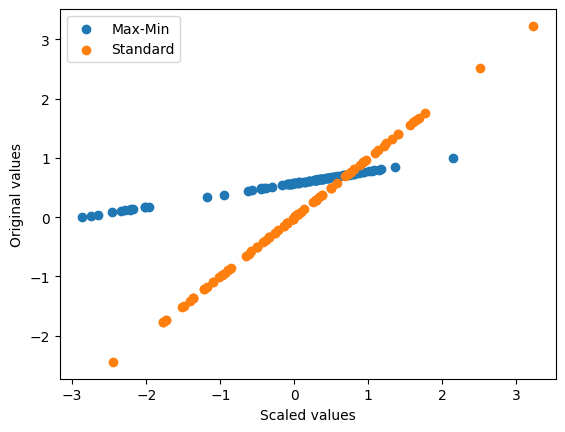

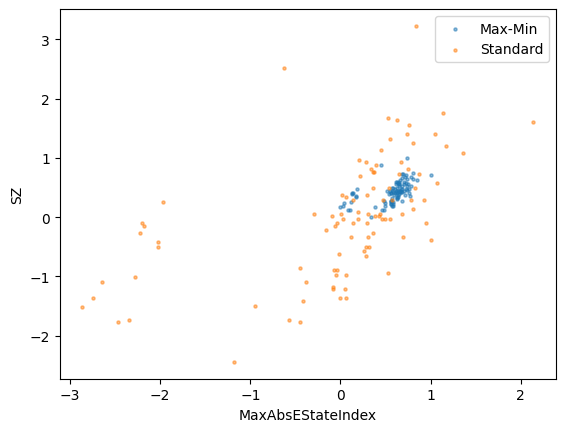

In [55]:
#@title Visualize the scaling
%matplotlib inline

import matplotlib.pyplot as plt

descriptor1='MaxAbsEStateIndex'
descriptor2='SZ'

original1=list(df_train_imputed[descriptor1])
maxmin1=list(df_train_imputed_mmscaled[descriptor1])
standard1=list(df_train_imputed_scaled[descriptor1])


original2=list(df_train_imputed[descriptor2])
maxmin2=list(df_train_imputed_mmscaled[descriptor2])
standard2=list(df_train_imputed_scaled[descriptor2])

plt.figure(0)
plt.scatter(original1,maxmin1,label='Max-Min')
plt.scatter(original2,standard2,label='Standard')
plt.xlabel('Scaled values')
plt.ylabel('Original values')
plt.legend()

plt.figure(1)
plt.scatter(maxmin1,maxmin2,label='Max-Min',s=5,alpha=0.5)
plt.scatter(standard1,standard2,label='Standard',s=5,alpha=0.5)
plt.xlabel(descriptor1)
plt.ylabel(descriptor2)
plt.legend()

